### 首先创建 简谱->音名的对应字典
因为手里的谱子是简谱，因此需要创建一个从简谱到音名的一一对应，规则
- 长音：-
- 下加线：<>
- 延长半音：.
- 小节线：|
- 低音：()
- 高音：[]

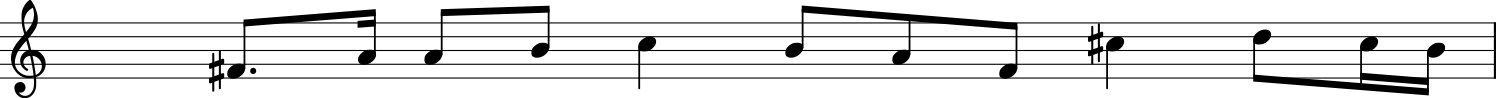

In [199]:

s = str2stream(aaaa)

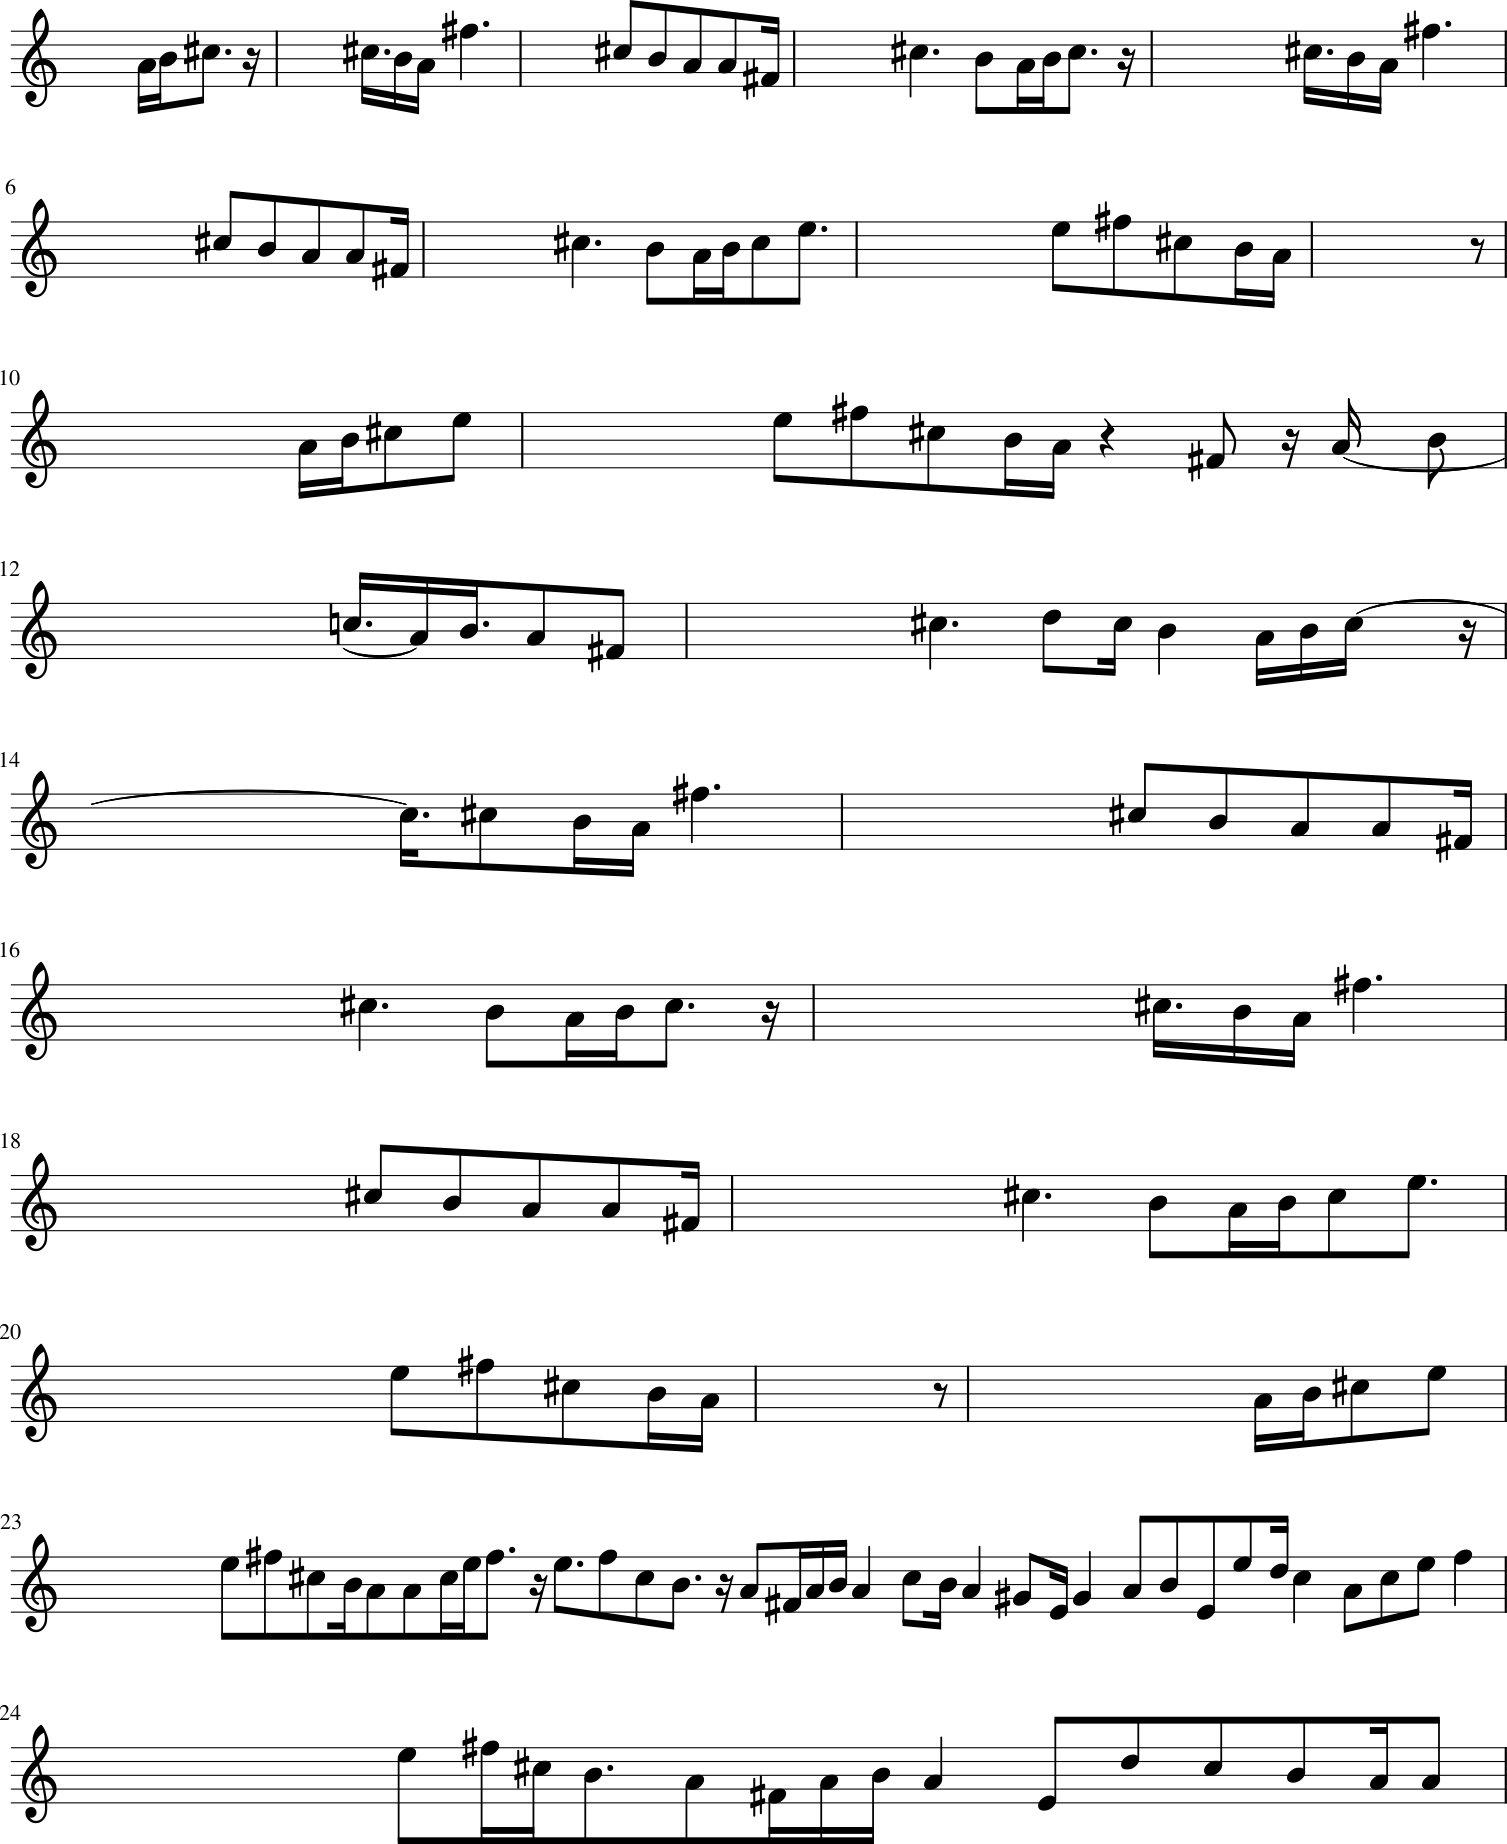

In [253]:
star = '11|55|66|5-|44|33|22|1-|55|44|33|2-|55|44|33|2-|11|55|66|5-|44|33|22|1-'
ship = '533-|422-|1355|3---'

manyyears = '1<12>|3<34>|5<65>|3-|5<43>|2-|'
manyyears += '4<32>|1-|1<12>|3<34>|5<65>|3-|'
manyyears += '5<43>|2<32>|1-|1-|5<43>|2<(55)>|'
manyyears += '4<32>|1-|5<43>|2<(55)>|4<32>|1-|'
manyyears += '1<12>|3<34>|5<65>|3-|5<43>|2<32>|1-|1-'

bring = '<33>3|<33>3|<351.<2>>|3-|<44>4|<43>3|<3223>|'
bring += '25|<33>3|<33>3|<351.<2>>|3-|<44>4|<43>3|'
bring += '<5542>|1-|<(5)321>|(5)-|<(5)321>|(6)-|<(6)432>|'
bring += '(7)-|<5542>|3-|<(5)321>|(5)-|<(5)321>|(6)-|'
bring += '<(6)432>|<55>5|<6542>|1-|<33>3|<33>3|<351.<2>>|'
bring += '3-|<44>4|<43>3|<3223>|25|<33>3|<33>3|'
bring += '<351.<2>>|3-|<44>4|<43>3|<5542>|1[1]'

aaaa = '<<(67)>#1.<0>>|<<#1.(76)>>#4.|<#1(766<#4>)>|#1.<(7)>'
aaaa +='<<(67)>#1.<0>>|<<#1.(76)>>#4.|<#1(766<#4>)>|#1.<(7)>'
aaaa +='<<(67)>#13.>|<3#4#1<(76)>> |<0> |<<(67)>#13> |<3#4#1<(76)>>0'
aaaa += '(<#4<0>67>)|<<1.(7.>6#4)>|#1.<2<#1>>(7)'

aaaa +='<<(67)>#1.<0>>|<<#1.(76)>>#4.|<#1(766<#4>)>|#1.<(7)>'
aaaa +='<<(67)>#1.<0>>|<<#1.(76)>>#4.|<#1(766<#4>)>|#1.<(7)>'
aaaa +='<<(67)>#13.>|<3#4#1<(76)>> |<0> |<<(67)>#13> |<3#4#1<(7>6)>'
aaaa +='<(6)<#13>#4.<0>3.#4#1(7. <0> 6<#467>6-)>'

aaaa +='<#1(<7>6-#5<3>#5-673)3<2#>>1'
aaaa +='<(6)#13#4-> | <3<#4#1>(7. 6<#467>6-)>'
aaaa +='<(3)2#1(7<6>6)| <(3)2#1>(7<6>6.) | <(3)2#1>(7<6>6.) | <(3)2#1>(7<6>7.)>'
aaaa +='<<(67)>#1#1|#3#1(<7>6-)| (6)#43#4|3#1(7>6)'
aaaa +='<(6)<6#46>>|6---'
s = str2stream(aaaa)


In [254]:
 s.write('midi', fp=r'C:\Users\UncleDong\Desktop\啊啊啊啊.wav')

'C:\\Users\\UncleDong\\Desktop\\啊啊啊啊.wav'

In [166]:

class Stack:
    "A container with a last-in-first-out (LIFO) queuing policy."

    def __init__(self):
        self.list = []

    def push(self, item):
        "Push 'item' onto the stack"
        self.list.append(item)

    def pop(self):
        "Pop the most recently pushed item from the stack"
        return self.list.pop()

    def isEmpty(self):
        "Returns true if the stack is empty"
        return len(self.list) == 0


class Queue:
    "A container with a first-in-first-out (FIFO) queuing policy."

    def __init__(self):
        self.list = []

    def push(self, item):
        "Enqueue the 'item' into the queue"
        self.list.insert(0, item)

    def pop(self):
        """
        Dequeue the earliest enqueued item still in the queue. This
        operation removes the item from the queue.
        """
        return self.list.pop()

    def isEmpty(self):
        "Returns true if the queue is empty"
        return len(self.list) == 0
    
PitchClass = ['C','D','E','F','G','A','B']
TypeClass = ['64th','32nd','16th','eighth','quarter','half','whole']   
class StrNote:
    '''
     对音符的字符串信息进行保存
     分别存储pitch，octave ,accidental，并最终拼接起来
    '''
    def __init__(self):
        '''
            默认简谱中的do是C5
            因此是pitch下标为0
            中音的八度octave是第五个
            没有升降号accidental 
            默认是四分之一音符4
            默认没有附点
        '''
        self.pitch = 0
        self.octave = 5
        self.accidental = ''
        self.type = 4
        self.dot = 0
        
    def __init__(self,pitch):
        '''
          有参构造
        '''
        self.pitch = pitch-1
        self.octave = 5
        self.accidental = ''
        self.type = 4
        self.dot = 0
            
    def __add__(self, y):
        '音调pitch加一位'
        self.pitch = (self.pitch+y)%7
        return self
        
    def __sub__(self,y):
        '音调pitch减一位'
        self.pitch = (self.pitch+7-y)%7
        return self
    
    def setflat(self):
        '降音'
        self.accidental = 'b'
    
    def setsharp(self):
        '升音'
        self.accidental = '#'
    
    def setnormal(self):
        '变成普通音'
        self.accidental = ''
        
    def higher(self):
        '提高一个八度'
        self.octave += 1 
        
    def lower(self):
        '降低一个八度'
        self.octave -= 1 
    
    def longer(self):
        '时间加长'
        if self.type == 5 and self.dot == 0:
            self.dot = 1
        else:
            self.type += 1
            
    def shotter(self):
        '时间减短'
        self.type -= 1
    
    def adddot(self):
        '添加附点'
        self.dot += 1
        
    def getstr(self):
        '返回这个音的字符串'
        return str(PitchClass[self.pitch]) + str(self.octave) + str(self.accidental)
        
    
    def getnote(self):
        if self.pitch == -1:
            stopnote = note.Rest(1)
            stopnote.duration.type = TypeClass[self.type]
            stopnote.duration.dots = self.dot
            return stopnote
        '返回音符对象'
        thisnote = note.Note(str(PitchClass[self.pitch]) + str(self.octave) + str(self.accidental))
        thisnote.duration.type = TypeClass[self.type]
        thisnote.duration.dots = self.dot
        return thisnote
 
'判断是数字还是符号'
def isnum(input):
    try:
        int(input)
        return True
    except:
        return False
    
    

In [102]:
note.Rest(1)

<music21.note.Rest rest>

In [167]:

charlist = []
notelist = []

'''
逆简谱表达式
要判断的内容：
- 长音：-
- 下加线：<>
- 延长半音：.
- 小节线：|
- 低音：()
- 高音：[]
- 升音：#
- 降音：b

'''

#'延长音'
def pauseline():   
    count = 0
    mid = charlist.pop()
    #当符号列表不为0 且 没有遍历完所有延长号'
    while len(charlist)!=0 and  mid != '-':
        mid = charlist.pop()
        count+=1
    #获取对应的那一位音符'
    midnote = notelist.pop()
    #进行延长'
    if count == 1:
        midnote.longer()
    elif count == 2:
        midnote.longer()
        midnote.adddot()
    elif count == 3:
        midnote.longer()
        midnote.longer()
    #再放回去'
    notelist.append(midnote)
 

def Reverse_Score_Notation():
    mid = charlist.pop()
    if mid != '|':
        charlist.append(mid)
    else:
        while len(charlist) != 0:
            charlist.append(mid)
            
def str2stream(music_str):

    s = stream.Score(id='mainScore')
    '''
    lowerflag  -  低音标志()
    higherflag -  高音标志[]
    shotterflag - 短时标志<>
    longgerflag - 长时标志--
    
    '''
    lowerflag = False
    higherflag = False
    sharpflag = False
    shotterflag = 0
    measurenum = 1
    for each in music_str:
        if isnum(each):
            midnote = StrNote(int(each))
            if lowerflag == True:
                midnote.lower()
            if higherflag == True:
                midnote.higher()
            if shotterflag != 0:
                for i in range(shotterflag):
                    midnote.shotter()
            if sharpflag == True:
                midnote.setsharp()
                #print(midnote)
                sharpflag = False
            notelist.append(midnote)
        else:
            if each == '(':
                lowerflag = True
            elif each == ')':
                lowerflag = False
            elif each == '[':
                higherflag = True 
            elif each == ']':
                higherflag = False 
            elif each == '<':
                shotterflag += 1 
            elif each == '>':
                shotterflag -= 1
            elif each == '.':
                notelist[len(notelist)-1].adddot()
            elif each == '-':
                notelist[len(notelist)-1].longer()
            elif each == '#':
                sharpflag = True
                #notelist[len(notelist)-1].setsharp()
            elif each == 'b':
                notelist[len(notelist)-1].setflat()
            elif each == '|':
                midstream = stream.Measure(number=measurenum)
                measurenum+=1
                for eachnote in notelist:
                    midstream.append(eachnote.getnote())
                s.append(midstream)
                notelist.clear()
            else:
                continue
                
    midstream = stream.Measure(number=measurenum)
    for eachnote in notelist:
        midstream.append(eachnote.getnote())
    s.append(midstream)
    notelist.clear()
    play(s)
    return s
        
        

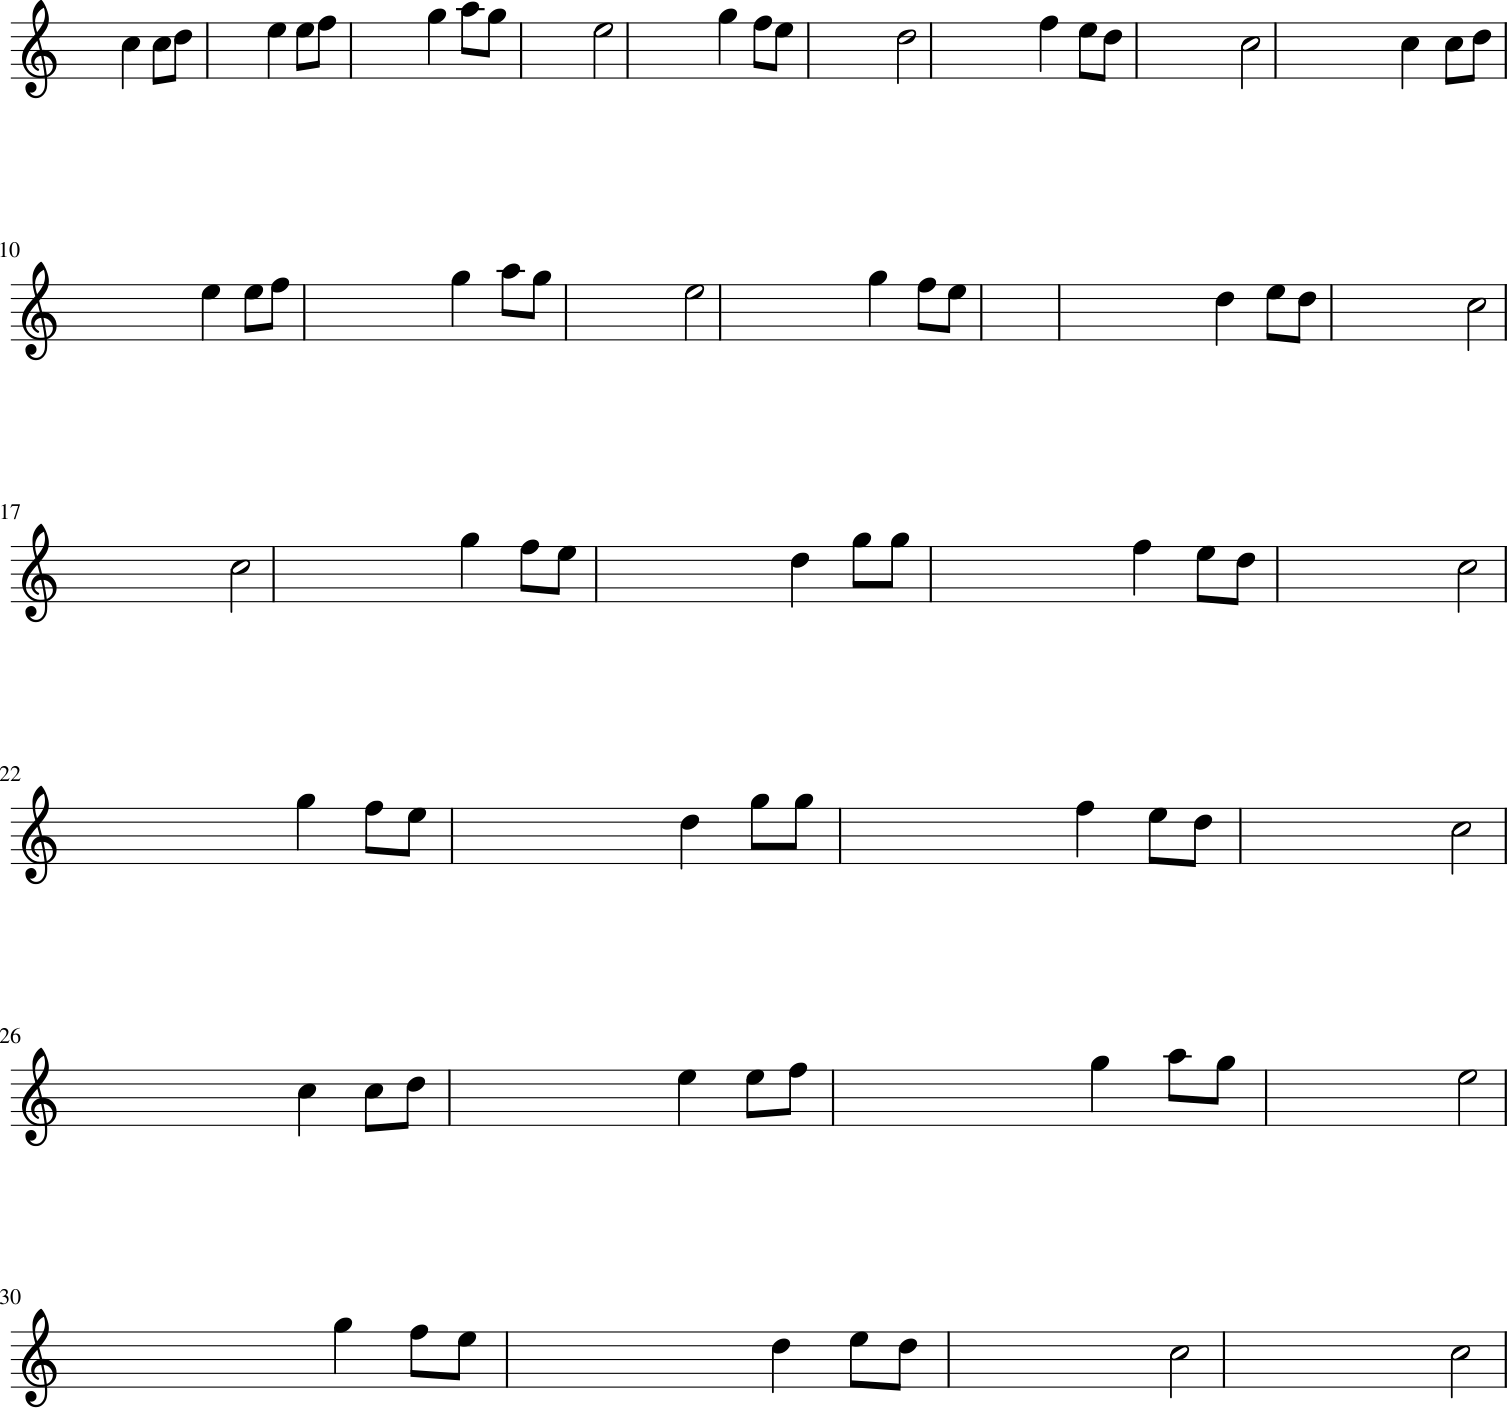

In [88]:
s = str2stream(manyyears)

In [2]:
from music21 import *


### 测试区域

In [17]:
s = stream.Score(id='mainScore')


m01 = stream.Measure(number=1)
m01.append(note.Note('C5#', type="half"))
m01.append(note.Note('C', type="quarter"))
m01.append(note.Note('C', type="eighth"))
m02 = stream.Measure(number=2)
m02.append(note.Note('D', type="whole"))
s.append([m01, m02])


#s.show()
#s.show('midi')

In [12]:
def play(x):
    """Returns nothing. Outputs a midi realization of x, a note or stream.
    Primarily for use in notebooks and web environments.
    """
    if isinstance(x, stream.Stream):
        # x = copy.deepcopy(x)
        for subStream in x.recurse(streamsOnly=True, includeSelf=True):
            mss = subStream.getElementsByClass(stream.Measure)
            for ms in mss:
                ms.offset += 1.0
    if isinstance(x, note.Note):
        s = stream.Stream()
        s.append(note.Rest(1))
        s.append(x)
        x = s
    x.show()
    x.show('midi')

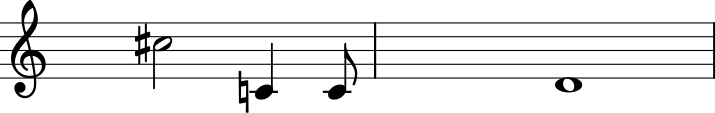

In [18]:
play(s)

In [98]:

duration.Duration(type='quarter', dots=float('inf'))

OverflowError: cannot convert float infinity to integer

In [100]:
int('inf')

ValueError: invalid literal for int() with base 10: 'inf'